In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors
import xarray as xr
import pandas as pd
import scipy.stats

In [11]:
def legcolor(leg):
    "function that gives back the color of legend elements, even if they are markers"
    for artist, text in zip(leg.legendHandles, leg.get_texts()):
            try:
                legcol = artist.get_color()
            except:
                legcol = artist.get_facecolor()
            if isinstance(legcol, np.ndarray):
                legcol = legcol[0]
            text.set_color(legcol)

JULY-JUNE YEAR

In [12]:
path = '../../data/observations/'
ds = xr.open_dataset(path+ 'profiles_15S_15N__180W_180E.nc')
pdjj   = pd.read_csv(path+'sst_NOAA_OIsst.csv', header=[0], index_col=0)

#here plotting SST#, year 2016 - 2008

#2007-08 = 3 = -0.367
#2010-11 = 6 = -0.263

#2015 = 11 = +0.47
#2014 = 10 = 0.25

pdjj.sort_values(by='sst anomaly')

year  sst anomaly
3   2007    -0.363720
6   2010    -0.289661
7   2011    -0.252174
4   2008    -0.108122
1   2005    -0.079535
13  2017    -0.070038
9   2013    -0.034573
8   2012    -0.010983
2   2006     0.055458
0   2004     0.065189
10  2014     0.154291
12  2016     0.157938
5   2009     0.243464
11  2015     0.532496

Here plotted all CRH profiles, see Extended data Figure 3

Text(0.5, 1.09, 'CIRS-ML annual mean tropical cloud radiative heating')

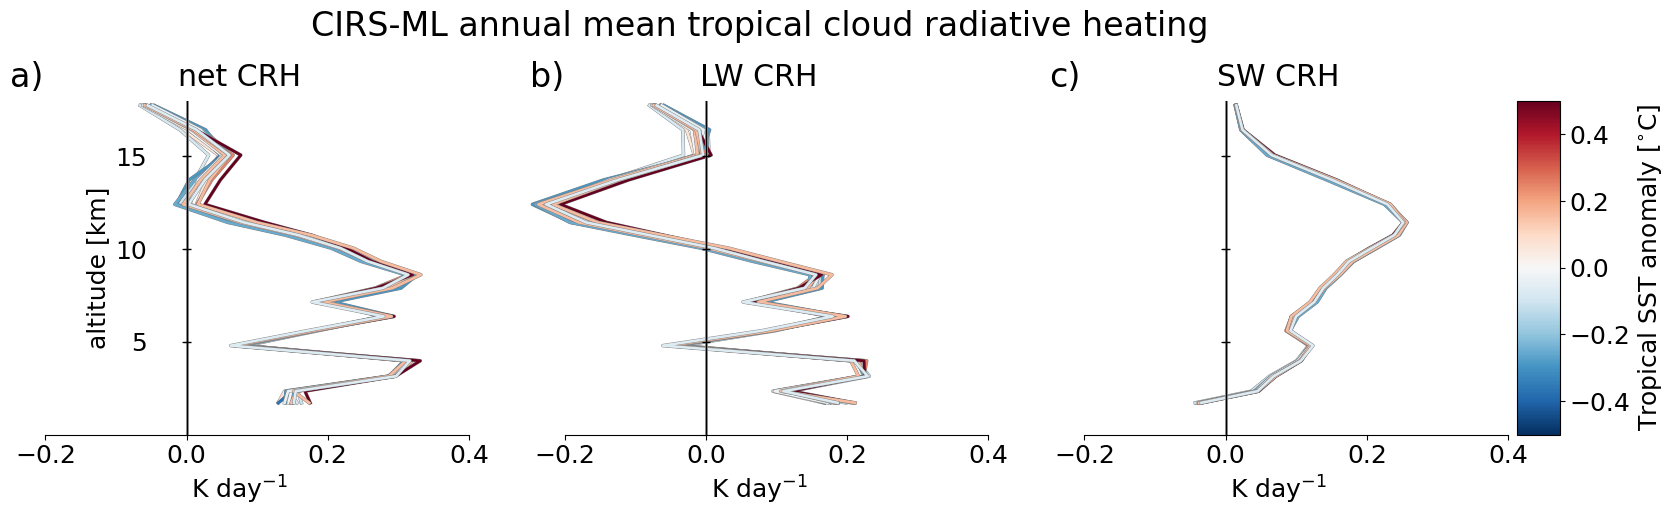

In [13]:
cmap1 = plt.cm.RdBu_r
plt.rcParams.update({'font.size': 18}) #all to 18 if not specified other
abc=['a','b','c','d','e','f']

variables = ['ACRE_hr','LW_ACRE_hr','SW_ACRE_hr']
names = ['net CRH','LW CRH','SW CRH']
savepath='/path-to-file/'
#################################################################################
vlim = 0.5
sst_dev_trop15_annual = pdjj.values[:,1]
sst_anom= pdjj.values[:,1]
levels = ds['altitude'].values
fig = plt.figure()
fig.set_size_inches(20,4.333,forward=True)
gs = gridspec.GridSpec(1,30,height_ratios=[1],width_ratios=30*[1])
x0 = [0,10,20]
for v,variable in enumerate(variables):
    ax = fig.add_subplot(gs[0,x0[v]:x0[v]+9])
    acre_15 = ds[variable].values
    acre_15[:,0:3] = np.nan
    for i in range(0,len(sst_dev_trop15_annual)):
        value= (sst_dev_trop15_annual[i]+vlim)/(vlim+vlim)
        plt.plot(acre_15[i]+0.0,levels,color='gray',linewidth=2.5)
        plt.plot(acre_15[i]+0.0, levels, color=cmap1(value),linewidth=1.9)
        plt.ylim(0,18)
        plt.xlim(-0.25,0.4)

    plt.xlabel('K day$^{-1}$')
    plt.axvline(x = 0, color = 'gray',linewidth=2)
    if v==0:
        plt.ylabel('altitude [km]')
    plt.title(names[v],y=1.02)

    plt.text(0.0,1.12,abc[v]+')',transform=ax.transAxes,horizontalalignment='left',
    verticalalignment='top',fontsize=24,color='black',bbox=dict(facecolor='white', edgecolor='none', pad=1))   

    ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_bounds(-0.2,0.4)
    if v==0:
        ax.tick_params(axis='y', which='major', pad=25)
        ax.get_yaxis().set_ticks([5,10,15])
    if v>0:
         ax.get_yaxis().set_ticklabels([])
    plt.axvline(x = 0, color = 'k',linewidth=0.75)
    vertticks=[5,10,15]
    plt.plot([0,0,0],[vertticks[i] for i in range(0,3)], marker="_", label="points",color='k',linewidth=0.75)
    plt.ylim(0,18)
sm = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=-vlim, vmax=vlim))

cax1 = fig.add_subplot(gs[0,29])
cbar = plt.colorbar(sm,cax=cax1)
cbar.set_label('Tropical SST anomaly [$^{\circ}$C]')

plt.suptitle('CIRS-ML annual mean tropical cloud radiative heating',y=1.09,size=24)
#plt.savefig(savepath+'Fig_S5abc_CRH_Airs-ML_junjul_biascorr_plot_SST_jul-jun.pdf',dpi=200,bbox_inches='tight')#

In [14]:
#load cloud radiative heating profiles
crh = ds['ACRE_hr'].values
sst_anom_2d = np.tile(sst_anom[:,np.newaxis],(1,22)) #add the vertical dimension

#load SSTs: july to june year
pdjj   = pd.read_csv(path+'/sst_NOAA_OIsst.csv', header=[0], index_col=0) #normal

sst_anom= pdjj.values[:,1]
sst_anom_2d = np.tile(sst_anom[:,np.newaxis],(1,22)) #add the vertical dimension

crh = ds['ACRE_hr'].values
crh[:,0:2] = np.nan #values close to surface not trustworthy -> remove them

In [15]:
slope_all =[]

for i in range(0,22):
    slope, intercept, r, p, se = scipy.stats.linregress(sst_anom,crh[:,i])
    slope_all.append(slope)

In [16]:
#LOAD RCEMIP DATA
path = '../../data/RCEMIP_processed/'

ssts = ['295','300','305']
col = ['dodgerblue','orange','crimson']

plt.rcParams.update({'font.size': 18}) #all to 18 if not specified other
variables = ['hr_acre','clear_sky_radiative_heating','cloud_fraction',
             'density','cloud_and_precip_ice_mixing_ratio','ice_mixing_ratio']
units = ['K/day','K/day','K/day','1','kg/m3','kg/kg']

ds1 = xr.open_dataset(path+'RCElarge_z24_merged_1D_averages_multiplevars2.nc')

variables = ['hr_acre','hr_acre_lw','hr_acre_sw']
variables2 = ['ACRE_hr','LW_ACRE_hr','SW_ACRE_hr']

In [17]:
#USE ONLY CRMS + SP GCMS
crms = [0,1,2,3,4,5,6,7,12,13,17,14,15]

Text(0.5, 1.09, 'CRH shift in RCEMIP and tropical observations')

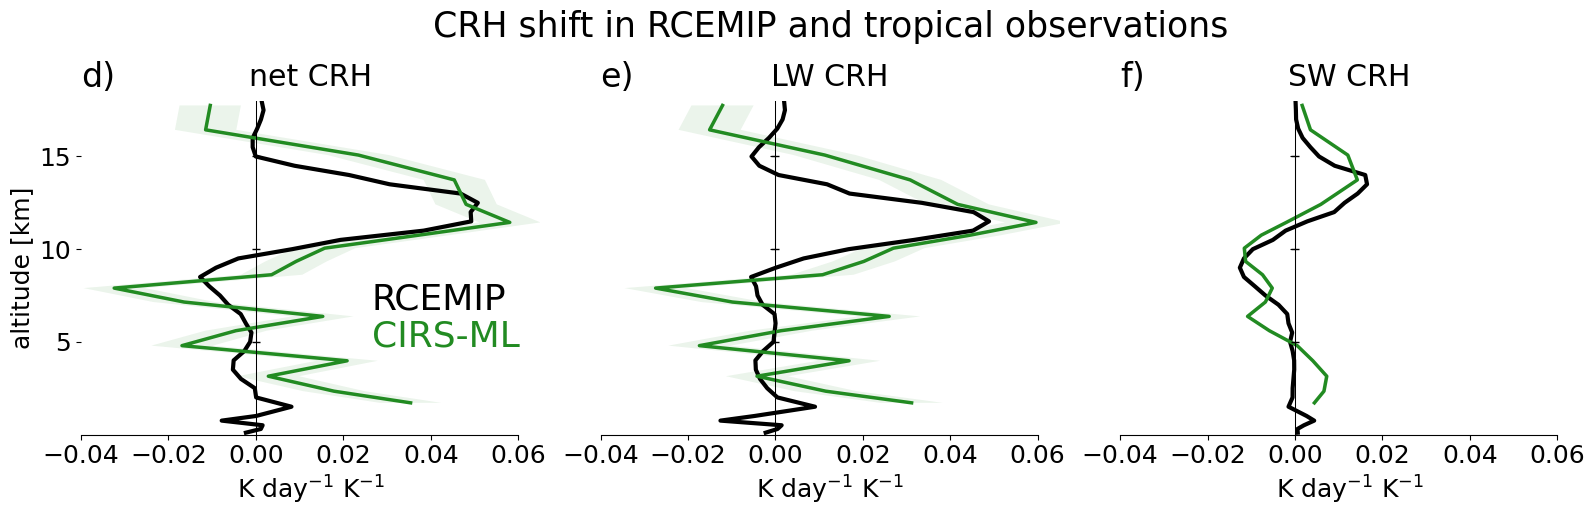

In [18]:
units = ['K/day /K','1','kg/m3']
y0 = [0,0,0,2,2,2,4,4,4,6,6,6,8,8,8,10,10,10,12,12,12]
x0 = [0,10,20]*6
b=[]
fig = plt.figure()
#fig.set_size_inches(25,5.4167,forward=True)
fig.set_size_inches(20,4.333,forward=True)
gs = gridspec.GridSpec(1,30,height_ratios=[1],width_ratios=30*[1])

for v,variable in enumerate(variables):
    ax = fig.add_subplot(gs[y0[v],x0[v]:x0[v]+9])
    #select only CRMs
    plotvar0 = ds1[variable].sel(model=crms, drop=True)

    #divide by 10 as RCEMIP has a delta T of 10 K
    plotvar_med = (plotvar0.median(axis=0)).values/10
    b.append(plt.plot(plotvar_med[2]-plotvar_med[0], ds1['alt'].values,color='k',linewidth=3,linestyle='-')[0]) 
    ##############################################################
    #observations
    acre_15 = ds[variables2[v]].values
    #linear regression
    slope_all =[]
    for i in range(0,22):
        slope, intercept, r, p, se = scipy.stats.linregress(sst_anom,acre_15[:,i])
        slope_all.append(slope)
    #linear regression stop
    b.append(plt.plot(slope_all, levels, color='forestgreen',linewidth=2.5)[0])
    plt.fill_betweenx(levels,slope_all-se, slope_all+se,facecolor='forestgreen',alpha=0.09,
            label='25 to 75 percentile range')
    ############################################################

    #ax.spines['left'].set_position(('data',0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_bounds(-0.04,0.06)
    ax.get_yaxis().set_ticks([5,10,15])
    ax.get_yaxis().set_ticklabels([])
    if v>0:
        ax.spines['left'].set_position(('data',0))

    plt.axvline(x = 0, color = 'k',linewidth=0.75)
    vertticks=[5,10,15]
    plt.plot([0,0,0],[vertticks[i] for i in range(0,3)], marker="_", label="points",color='k',linewidth=0.75)
    plt.ylim(0,18)

    plt.xlabel('K day$^{-1}$ K$^{-1}$')
    plt.xlim(-0.04,0.065)

    if np.mod(v,3)==0:
        plt.ylabel('altitude [km]')
    plt.title(names[v],y=1.02)
    if v==0:
        ax.get_yaxis().set_ticklabels([5,10,15])
        leg = plt.legend(b,['RCEMIP','CIRS-ML'],fontsize=26,frameon=False,handlelength=0,
                         markerscale=0,labelspacing=0.07,bbox_to_anchor=(0.5,0.35))
        legcolor(leg) #function legend text color!!!  

    plt.text(0.0,1.12,abc[v+3]+')',transform=ax.transAxes,horizontalalignment='left',
    verticalalignment='top',fontsize=24,color='black',bbox=dict(facecolor='white', edgecolor='none', pad=1))   
plt.suptitle('CRH shift in RCEMIP and tropical observations',size=25,y=1.09)       
#plt.savefig('/path-to-file/Fig_S5def_ANOMALIES_RCElarge_perK_w_CIRS_SSTjul-jun.pdf',dpi=200,bbox_inches='tight')     